<h1> ROAD ACCIDENT </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_regression

<h2>I - Intro</h2>

In [2]:
train = pd.read_csv("C:/Users/Ilias/documents/cours_mines/kaggle/road_accident/train.csv", index_col='id')
X_test = pd.read_csv('C:/Users/Ilias/documents/cours_mines/kaggle/road_accident/test.csv', index_col='id')

train

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19


In [3]:
nan_ratio = train.isna().sum()
print(nan_ratio)

road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64


<h2>II - EDA</h2>

In [4]:
"""def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

X = train.copy()
y = X.pop("accident_risk")

# ici je calcule la mutual information score de chaque feature
mi_scores = make_mi_scores(X, y)
mi_scores"""

'def make_mi_scores(X, y):\n    X = X.copy()\n    for colname in X.select_dtypes(["object", "category"]):\n        X[colname], _ = X[colname].factorize()\n    # All discrete features should now have integer dtypes\n    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]\n    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)\n    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)\n    mi_scores = mi_scores.sort_values(ascending=False)\n    return mi_scores\n\n\ndef plot_mi_scores(scores):\n    scores = scores.sort_values(ascending=True)\n    width = np.arange(len(scores))\n    ticks = list(scores.index)\n    plt.barh(width, scores)\n    plt.yticks(width, ticks)\n    plt.title("Mutual Information Scores")\n\nX = train.copy()\ny = X.pop("accident_risk")\n\n# ici je calcule la mutual information score de chaque feature\nmi_scores = make_mi_scores(X, y)\nmi_scores'

In [5]:
train.shape

(517754, 13)

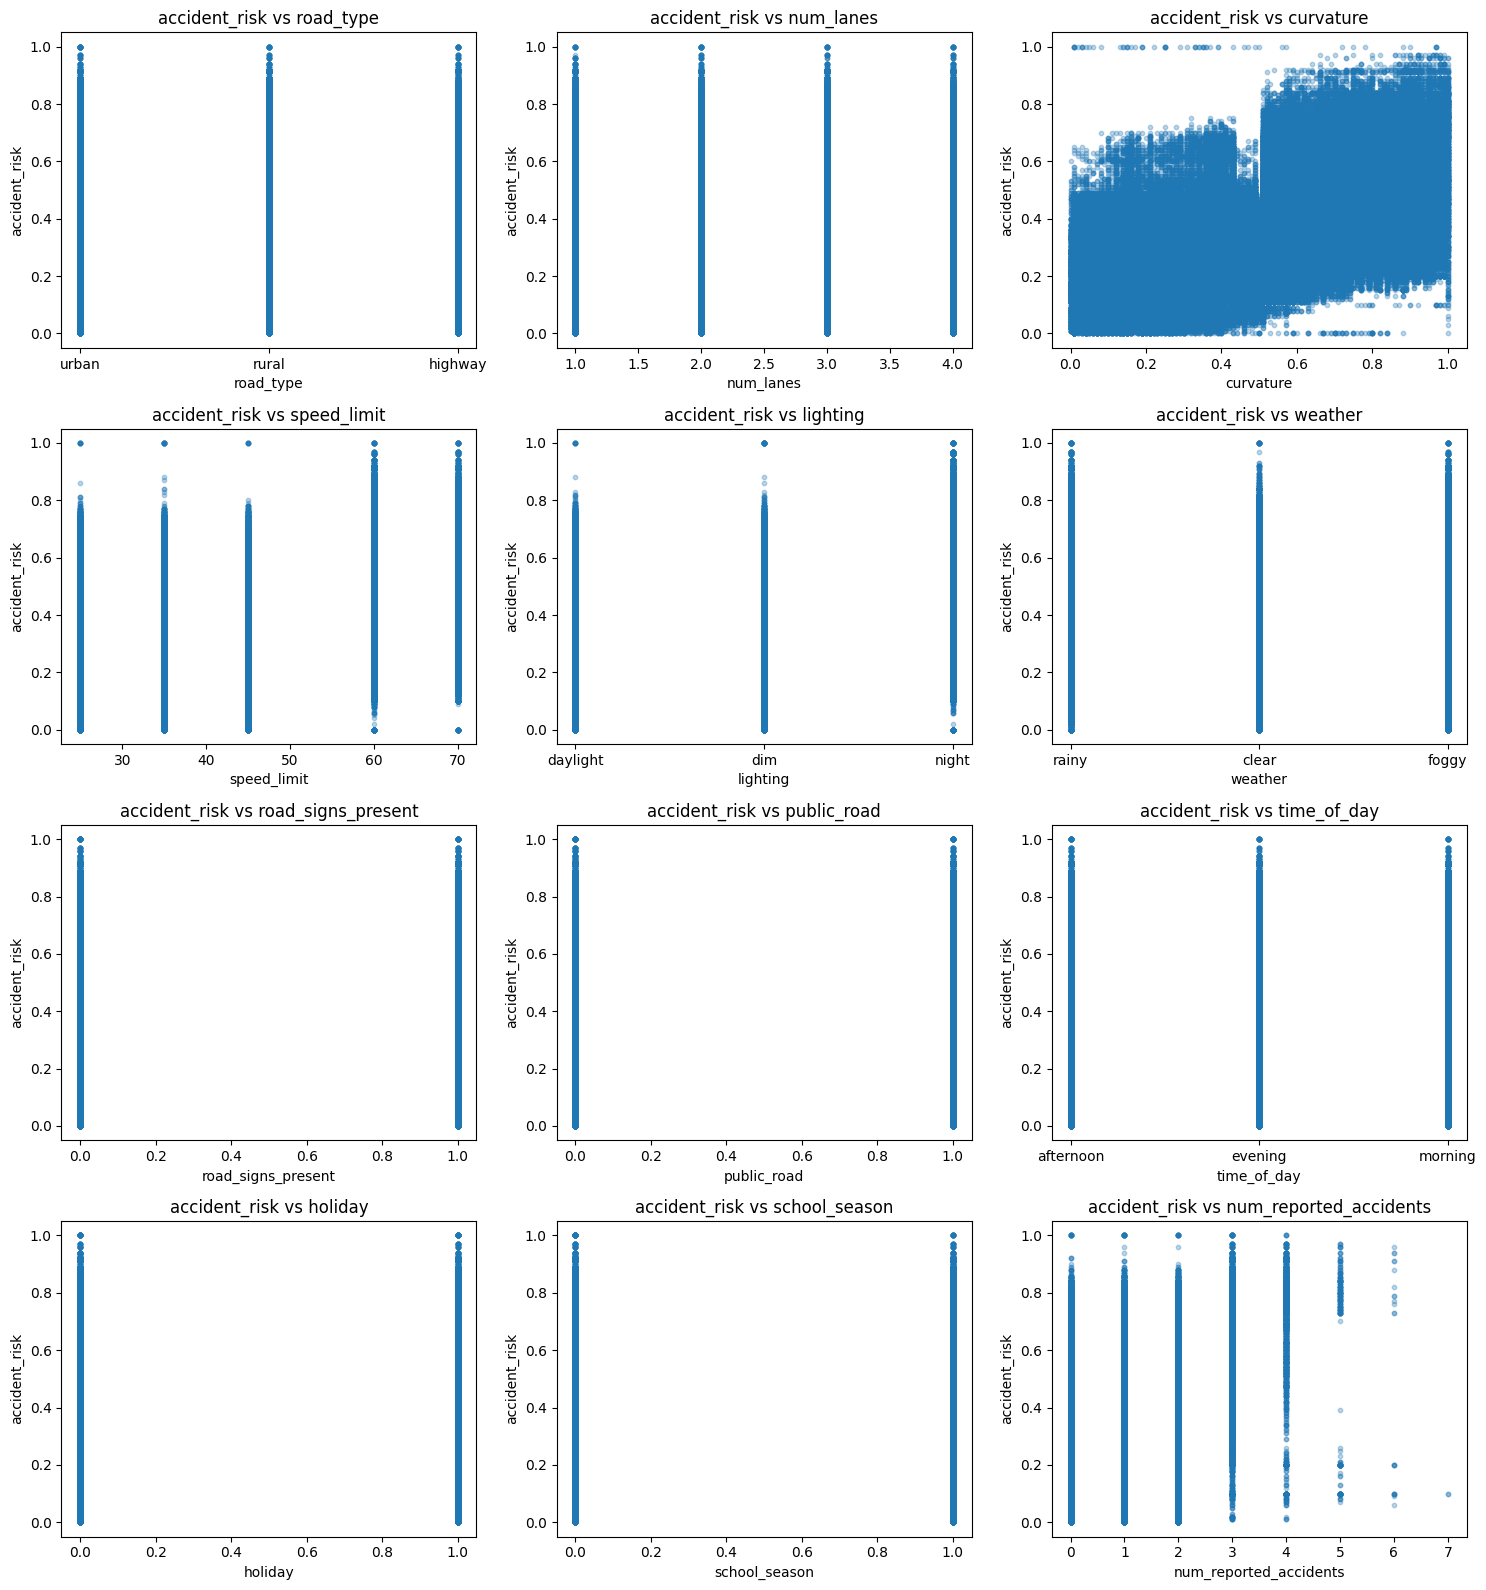

In [6]:
import matplotlib.pyplot as plt
import math

n_cols = 3
n_rows = math.ceil(len(train.columns[:-1]) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten() 

for i, col in enumerate(train.columns[:-1]):
    ax = axes[i]
    ax.scatter(train[col], train["accident_risk"], s=10, alpha=0.3)
    ax.set_xlabel(col)
    ax.set_ylabel("accident_risk")
    ax.set_title(f"accident_risk vs {col}")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [7]:
train.describe()

,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,2.491511,0.488719,46.112575,1.187970,0.352377
std,1.120434,0.272563,15.788521,0.895961,0.166417
min,1.000000,0.000000,25.000000,0.000000,0.000000
25%,1.000000,0.260000,35.000000,1.000000,0.230000
50%,2.000000,0.510000,45.000000,1.000000,0.340000
75%,3.000000,0.710000,60.000000,2.000000,0.460000
max,4.000000,1.000000,70.000000,7.000000,1.000000


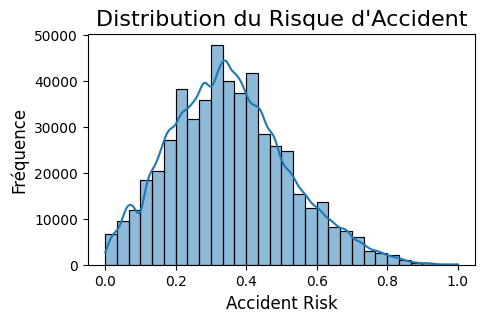

In [8]:
plt.figure(figsize=(5, 3))
sns.histplot(train['accident_risk'], kde=True, bins=30) # kde=True ajoute une courbe de densité
plt.title('Distribution du Risque d\'Accident', fontsize=16)
plt.xlabel('Accident Risk', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.show()

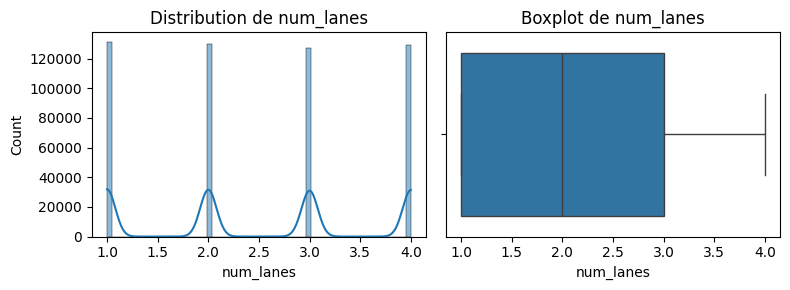

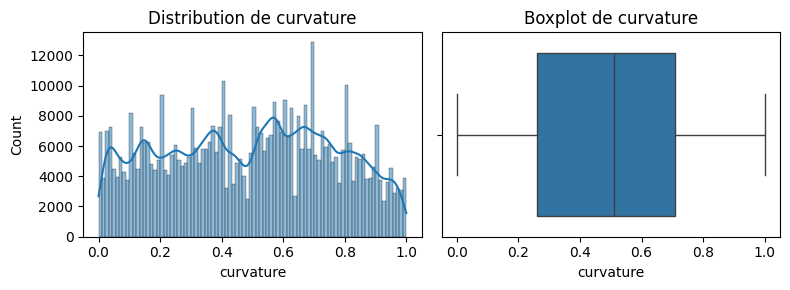

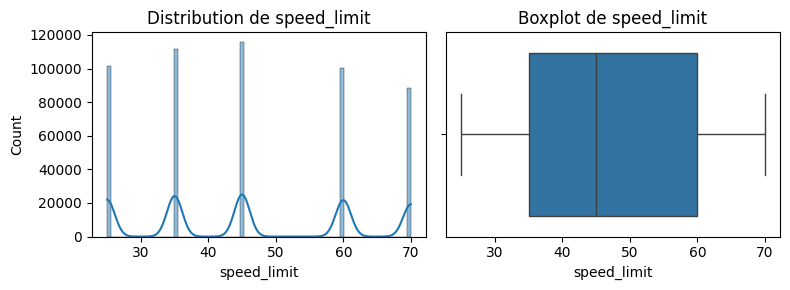

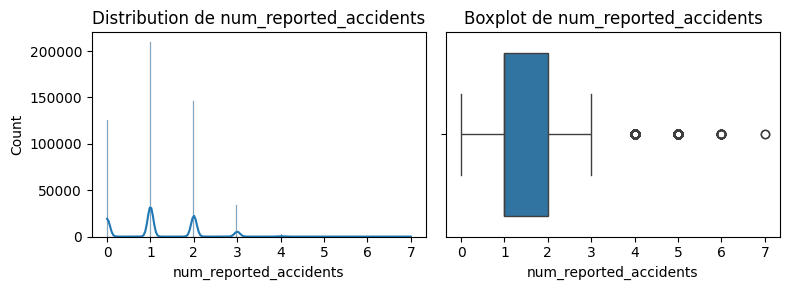

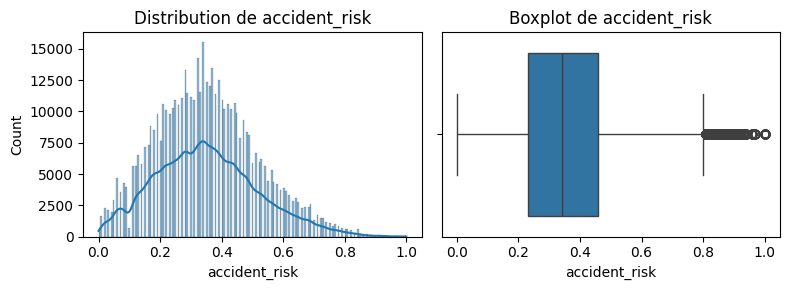

In [9]:
numerical_features = train.select_dtypes(include=np.number).columns.tolist()

for col in numerical_features:
    plt.figure(figsize=(8, 3))

    # Histogramme
    plt.subplot(1, 2, 1) # 1 ligne, 2 colonnes, 1er graphique
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution de {col}')

    plt.subplot(1, 2, 2) # 1 ligne, 2 colonnes, 2ème graphique
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

In [10]:
outliers_df = train[train['num_reported_accidents'] >= 4]

print(outliers_df.describe())
print("\nType de route le plus fréquent pour les outliers :")
print(outliers_df['road_type'].value_counts())
print("\nMétéo la plus fréquente pour les outliers :")
print(outliers_df['weather'].value_counts())

         num_lanes    curvature  speed_limit  num_reported_accidents  \
count  2649.000000  2649.000000  2649.000000             2649.000000   
mean      2.783692     0.711888    58.858060                4.107588   
std       1.108716     0.236161    15.386764                0.344540   
min       1.000000     0.000000    25.000000                4.000000   
25%       2.000000     0.580000    60.000000                4.000000   
50%       3.000000     0.750000    70.000000                4.000000   
75%       4.000000     0.900000    70.000000                4.000000   
max       4.000000     1.000000    70.000000                7.000000   

       accident_risk  
count    2649.000000  
mean        0.678313  
std         0.223770  
min         0.010000  
25%         0.600000  
50%         0.760000  
75%         0.820000  
max         1.000000  

Type de route le plus fréquent pour les outliers :
road_type
urban      895
highway    890
rural      864
Name: count, dtype: int64

Météo la p

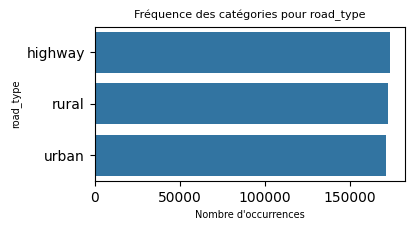

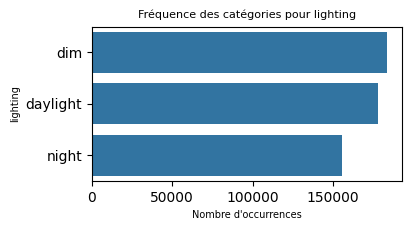

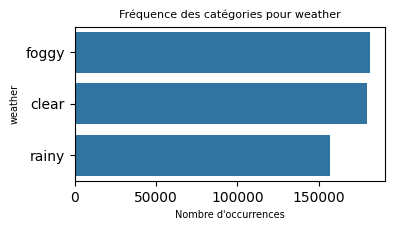

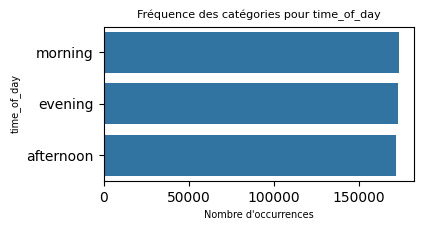

['road_type', 'lighting', 'weather', 'time_of_day']


In [11]:
categorical_features = train.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_features:
    plt.figure(figsize=(4, 2))
    sns.countplot(y=train[col], order=train[col].value_counts().index)
    plt.title(f'Fréquence des catégories pour {col}', fontsize=8)
    plt.xlabel('Nombre d\'occurrences', fontsize=7)
    plt.ylabel(col, fontsize=7)
    plt.show()
print(categorical_features)

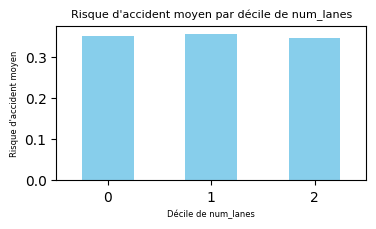

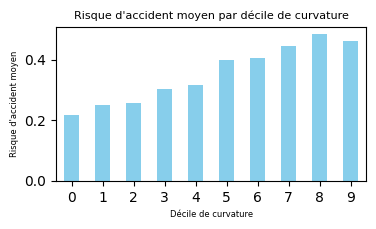

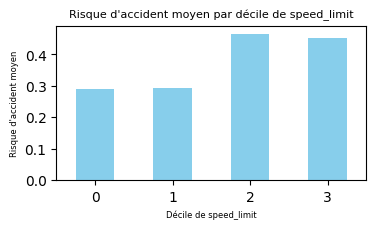

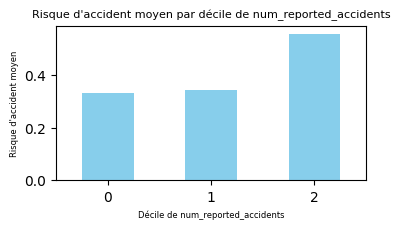

In [12]:
numerical_features_wo = train.select_dtypes(include=np.number).columns.tolist()[:4]

for feature_to_analyze in numerical_features_wo : 

        df = train.copy()
        df[f'{feature_to_analyze}_decile'] = pd.qcut(df[feature_to_analyze], q=10, labels=False, duplicates='drop')
        mean_risk_by_decile = df.groupby(f'{feature_to_analyze}_decile')['accident_risk'].mean()
        plt.figure(figsize=(4, 2))
        mean_risk_by_decile.plot(kind='bar', color='skyblue')
        plt.title(f'Risque d\'accident moyen par décile de {feature_to_analyze}', fontsize=8)
        plt.xlabel(f'Décile de {feature_to_analyze}', fontsize=6)
        plt.ylabel('Risque d\'accident moyen', fontsize=6)
        plt.xticks(rotation=0)
        plt.show()

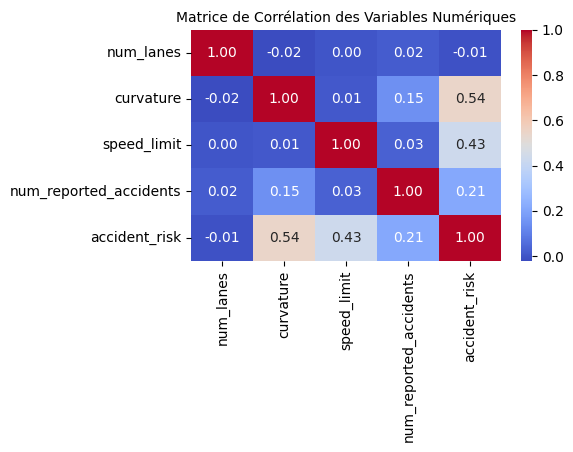

In [13]:
plt.figure(figsize=(5, 3))
correlation_matrix = train[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=10)
plt.show()

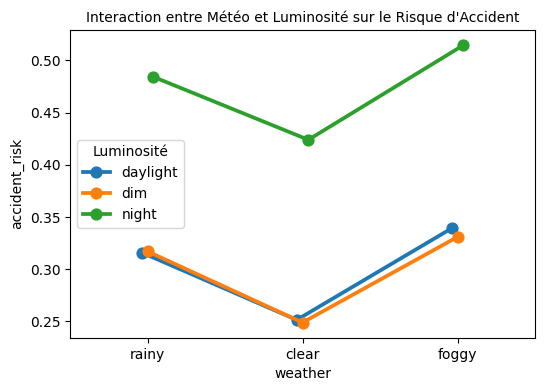

In [14]:
# Interaction entre 'lighting' et 'weather' sur 'accident_risk'
plt.figure(figsize=(6, 4))
sns.pointplot(x='weather', y='accident_risk', hue='lighting', data=train, dodge=True)
plt.title('Interaction entre Météo et Luminosité sur le Risque d\'Accident', fontsize=10)
plt.legend(title='Luminosité')
plt.show()

--- Analyse de : road_signs_present ---
                        mean   count
road_signs_present                  
False               0.352273  259289
True                0.352482  258465




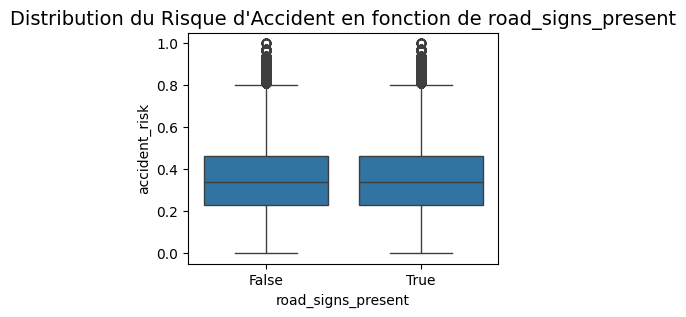

--------------------------------------------------
--- Analyse de : public_road ---
                 mean   count
public_road                  
False        0.347190  257709
True         0.357518  260045




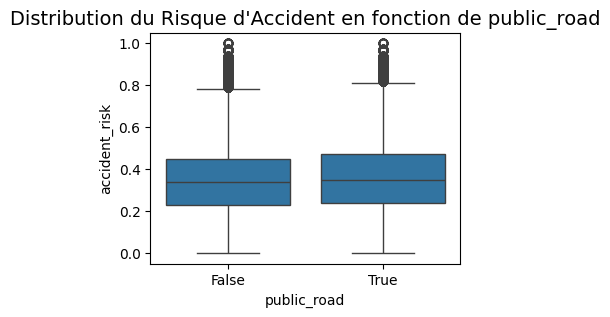

--------------------------------------------------
--- Analyse de : holiday ---
             mean   count
holiday                  
False    0.343809  257066
True     0.360827  260688




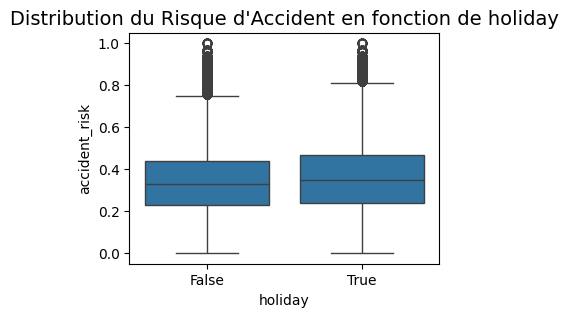

--------------------------------------------------
--- Analyse de : school_season ---
                   mean   count
school_season                  
False          0.352539  260164
True           0.352214  257590




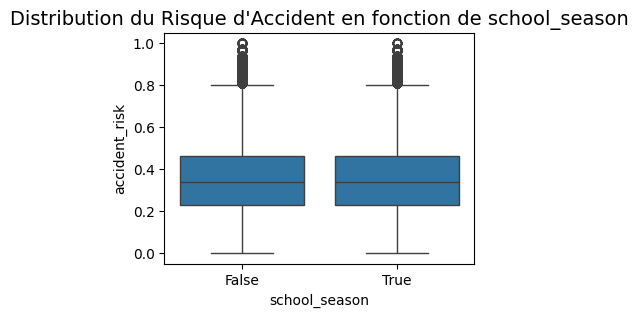

--------------------------------------------------


In [15]:
features_to_check = ['road_signs_present', 'public_road', 'holiday', 'school_season']

for feature in features_to_check:
    print(f"--- Analyse de : {feature} ---")
    analysis = train.groupby(feature)['accident_risk'].agg(['mean', 'count'])
    print(analysis)
    print("\n")

    plt.figure(figsize=(4, 3))
    sns.boxplot(x=feature, y='accident_risk', data=train)
    plt.title(f'Distribution du Risque d\'Accident en fonction de {feature}', fontsize=14)
    plt.show()
    print("-" * 50)

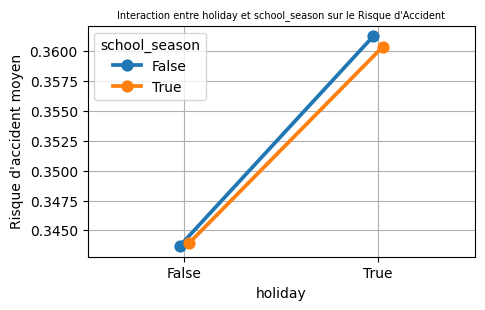

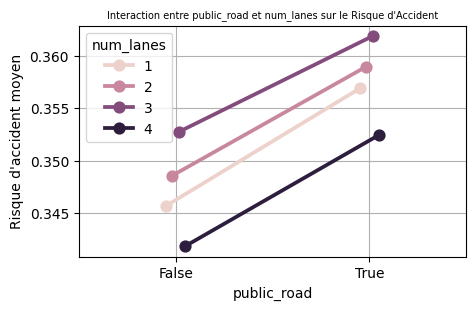

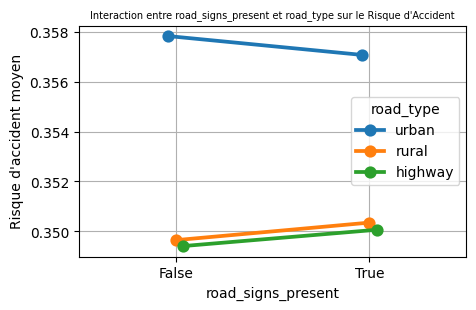

In [16]:
for (i,j) in [('holiday','school_season'), ('public_road', 'num_lanes'), ('road_signs_present', 'road_type')]:    
    plt.figure(figsize=(5, 3))
    sns.pointplot(x=i, y='accident_risk', hue=j, data=train, dodge=True, errorbar=None)
    plt.title(f"Interaction entre {i} et {j} sur le Risque d'Accident", fontsize=7)
    plt.ylabel("Risque d'accident moyen")
    plt.grid(True)
    plt.show()